# Project Report: Predicting Zestimate Logerror Using Clustering
## By Gabriela Tijerna & Justin Sullivan
### April 7, 2021

---

## Project Summary

> **Project Goal:**<br>
> Can we build a predictive model for logerror that would improve upon the baseline model's performance?

> **Project Approach:**<br>
> Will the use of Clustering Algorithms assist with selecting the best features for predicting logerror? 

> **Spoiler Alert:**
> 

---

## Data Wrangling

In [1]:
#imports
import pandas as pd
import numpy as np
import acquire
import prepare
import explore
from env import host, user, password

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn Tools and Modules
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

### Step 1: Data Acquisition<br>
> The Zillow Data was obtained from the CodeUp SQL Server Database:<br>
        > - Data includes single unit properties that were last sold in 2017<br>
        > - The properties are located within three counties in Southern California (Los Angeles, Ventura, Orange)


In [2]:
#Acquire Data using acquire module and get_zillow_data function
df = acquire.get_zillow_data(cached=True)

#Preview the shape of the acquired dataframe
table = [['Dataframe Name', '# of rows', '# of cols'], ['df', df.shape[0], df.shape[1]]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════╤═════════════╤═════════════╕
│ Dataframe Name   │   # of rows │   # of cols │
╞══════════════════╪═════════════╪═════════════╡
│ df               │       77413 │          67 │
╘══════════════════╧═════════════╧═════════════╛


### Step 2: Data Preparation

***A) Preview the Dataframe***

In [3]:
df.head(2)

,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,bathroomcnt,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,NaN,NaN,2.0,NaN,NaN,NaN,10711855,1087254,NaN,2.0,...,NaN,6.037113e+13,-0.007357,2017-07-07,NaN,NaN,NaN,Central,NaN,NaN
1,NaN,NaN,2.0,NaN,NaN,1.0,10711877,1072280,NaN,2.0,...,NaN,6.037113e+13,0.021066,2017-08-29,Central,NaN,NaN,Central,NaN,NaN


***B) Explore Nulls***

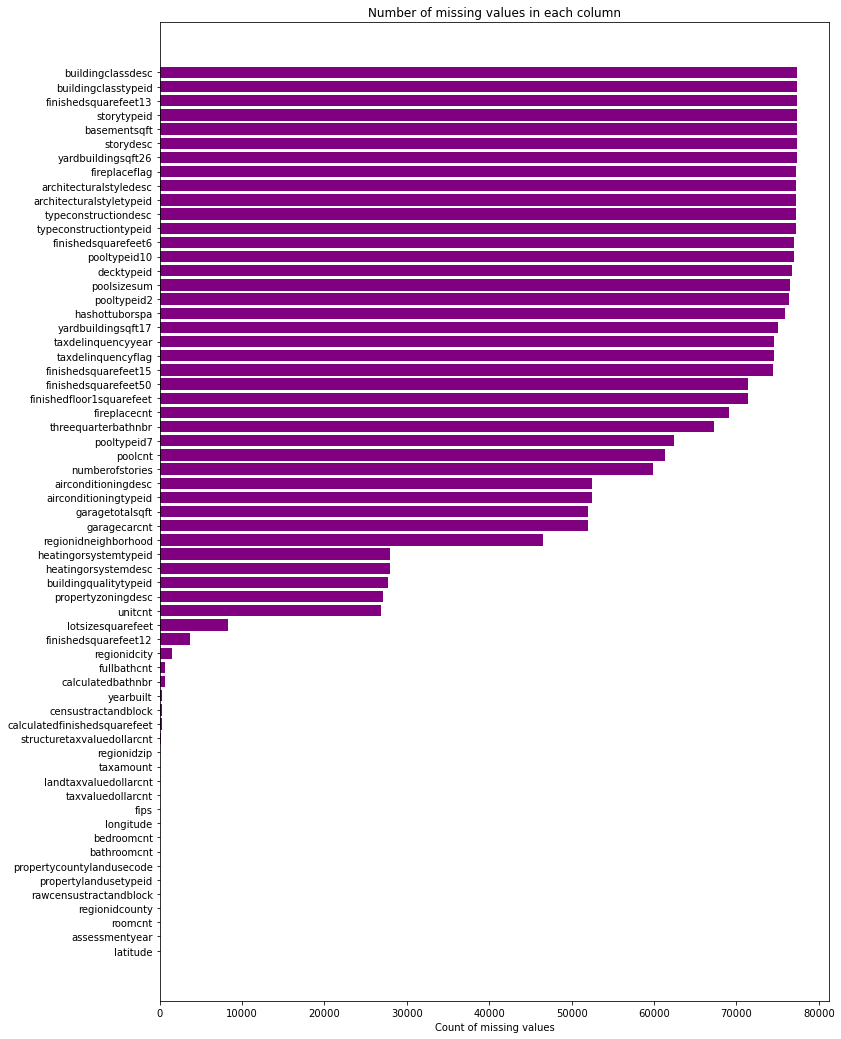

In [4]:
prepare.visualize_nulls(df)

> **How we dealt with Nulls:**<br>
    > - Dropped columns missing >= 50% of values <br>

***C) Explore Outliers***

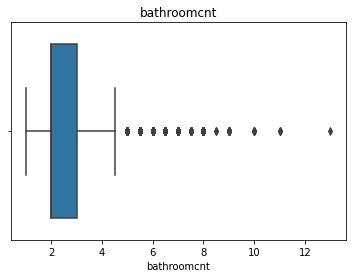

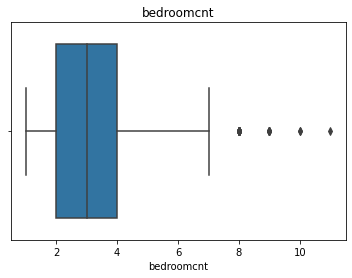

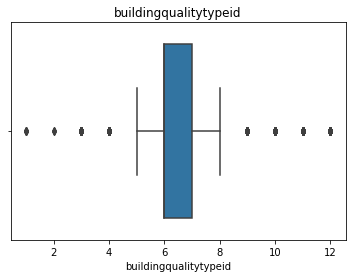

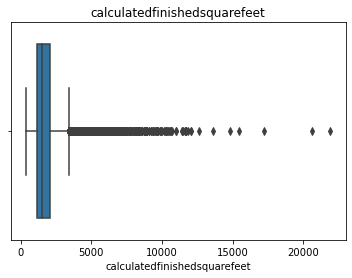

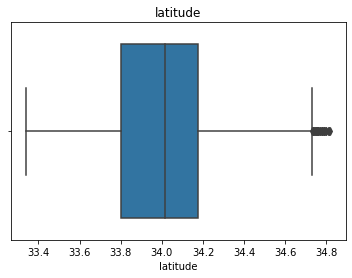

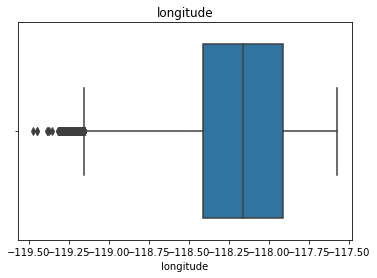

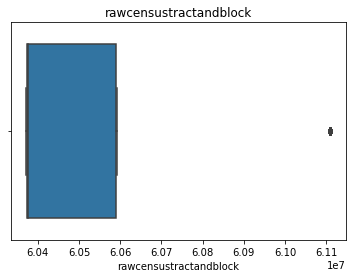

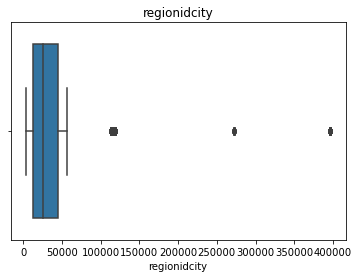

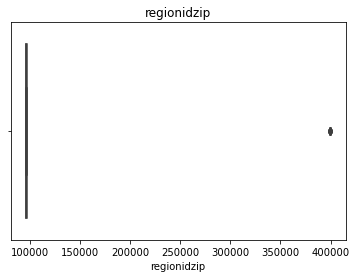

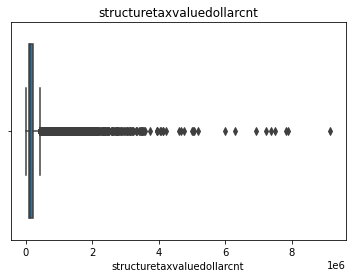

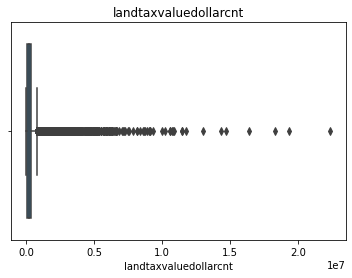

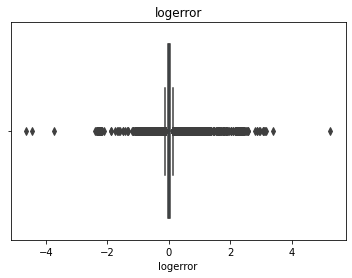

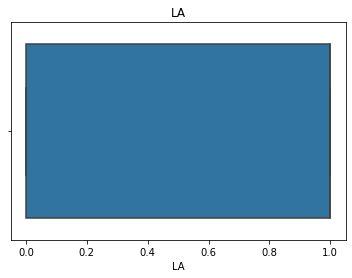

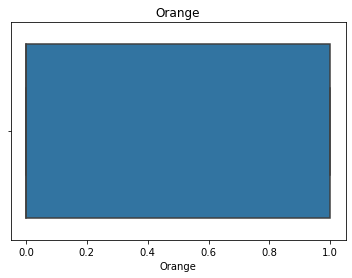

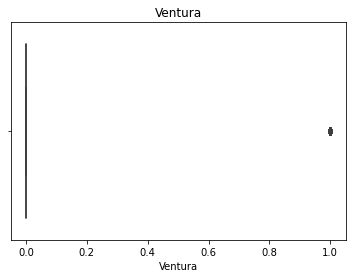

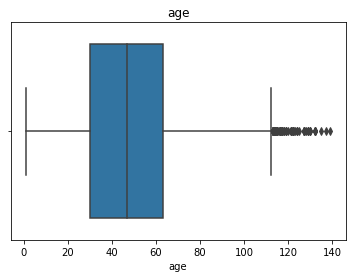

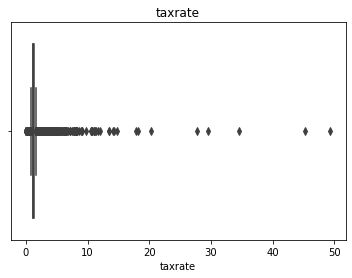

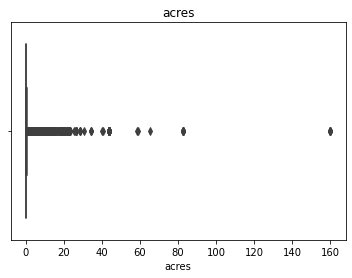

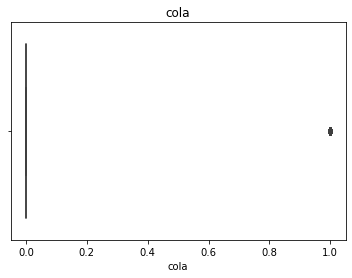

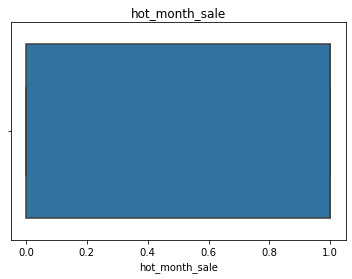

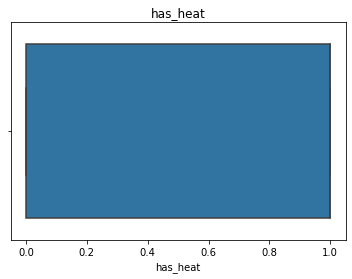

In [5]:
#Visualize Outlier Distribution
prepare.visualize_outliers(df)

In [6]:
#Retrieve report on outliers and the upper and lower bounds based off IQR with a multiplier of 3
prepare.outlier_report(df)

The lower and upper bound of the range for 'bathroomcnt' respectively is: -1.0 and 6.0
The lower and upper bound of the range for 'bedroomcnt' respectively is: -4.0 and 10.0
The lower and upper bound of the range for 'calculatedfinishedsquarefeet' respectively is: -1498.0 and 4718.0
The lower and upper bound of the range for 'acres' respectively is: -0.18906680440771345 and 0.5734848484848485
The lower and upper bound of the range for 'rawcensustractandblock' respectively is: 59720887.482094 and 61242751.692933
The lower and upper bound of the range for 'age' respectively is: -69.0 and 162.0
The lower and upper bound of the range for 'structuretaxvaluedollarcnt' respectively is: -310183.5 and 607458.75
The lower and upper bound of the range for 'taxrate' respectively is: 0.638194924850068 and 1.8603032169299083
The lower and upper bound of the range for 'landtaxvaluedollarcnt' respectively is: -773788.0 and 1224750.5
The lower and upper bound of the range for 'logerror' respectively is

> **How we dealt with Outliers**<br>
> - Taxrate<sup>1</sup>: Dropped observations where Tax Rates > 5%
> - Acres<sup>1</sup>: Dropped observations where acres > 12 
> - Squarefeet: Dropped observations where squarefeet > 10,000<br>
>
> -------- <br>
> <sup>1</sup>These are engineered features for this analysis

***D) Clean and Prepare Data***

In [7]:
df = prepare.wrangle_zillow_2nd()
df.head(1)

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,...,logerror,LA,Orange,Ventura,age,taxrate,acres,cola,hot_month_sale,has_heat
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.0,3.0,8.0,2107.0,34.222559,-118.617387,6.037113e+07,12447.0,96339.0,249655.0,...,-0.007357,1,0,0,45.0,1.227188,0.210239,1,1,1


## Data Exploration

### General Exploration

### Exploration Using Clustering

## Feature Engineering

## Modeling and Evaluation

### Modeling Approach

### All Counties Baseline Model

### All Counties Modeling

### Modeling By Indivdual Counties

## Conclusions & Next Steps